<a href="https://colab.research.google.com/github/MateuszMaterek92/neural_networks/blob/master/INTRO_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense #warstwa gęsta
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [3]:
# załadowanie danych
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba danych treningowych:', X_train.shape[0])
print('Liczba danych testowych:', X_test.shape[0])
print('Rozmiar pojedynczego obrazka:', X_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych: 60000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka: (28, 28)


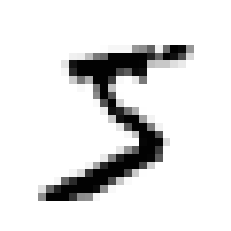

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='Greys')
plt.axis('off')
plt.show()

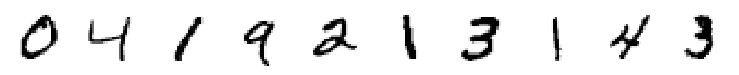

In [6]:
plt.figure(figsize=(13, 13))
for i in range(1, 11):
    plt.subplot(1, 10, i)
    plt.axis('off')
    plt.imshow(X_train[i], cmap='Greys')
plt.show()

In [7]:
#zmiana kształtu danych
X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [8]:
# y do zmiennych kategorycznych
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [9]:
model = Sequential()
model.add(Dense(units=512, activation='relu', input_shape=(28*28,)))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer=RMSprop(),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
history = model.fit(X_train, y_train,
                   batch_size=128,
                   epochs=20,
                   validation_data=(X_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/20





60000/60000 [==============================] - 8s 131us/step - loss: 0.2215 - acc: 0.9317 - val_loss: 0.0866 - val_acc: 0.9723
Epoch 2/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0805 - acc: 0.9751 - val_loss: 0.1071 - val_acc: 0.9687
Epoch 3/20
60000/60000 [==============================] - 7s 119us/step - loss: 0.0551 - acc: 0.9836 - val_loss: 0.1001 - val_acc: 0.9709
Epoch 4/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0400 - acc: 0.9874 - val_loss: 0.0705 - val_acc: 0.9805
Epoch 5/20
60000/60000 [==============================] - 7s 121us/step - loss: 0.0297 - acc: 0.9910 - val_loss: 0.0897 - val_acc: 0.9783
Epoch 6/20
60000/60000 [==============================] - 7s 120us/step - loss: 0.0239 - acc: 0.9929 - val_loss: 0.0918 - val_acc: 0.9792
Epoch 7/20
60000/600

In [12]:
# ocena wyniku
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 68us/step
Test loss: 0.13456383377710093
Test accuracy: 0.9833


In [0]:
# wykres dokładności
def make_accuracy_plot(history):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    acc, val_acc = history.history['acc'], history.history['val_acc']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set()
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()

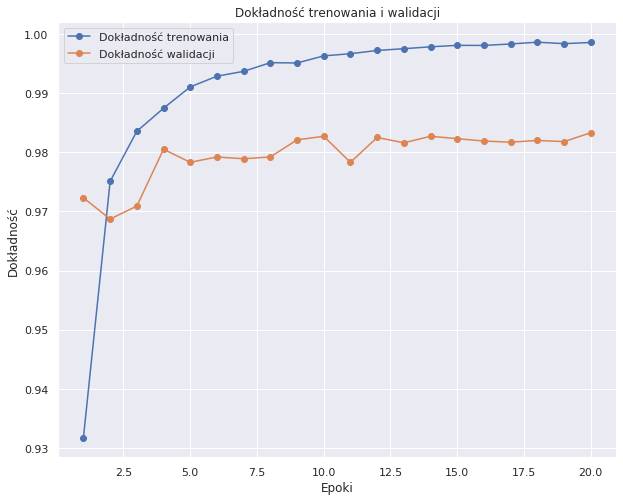

In [15]:
make_accuracy_plot(history)

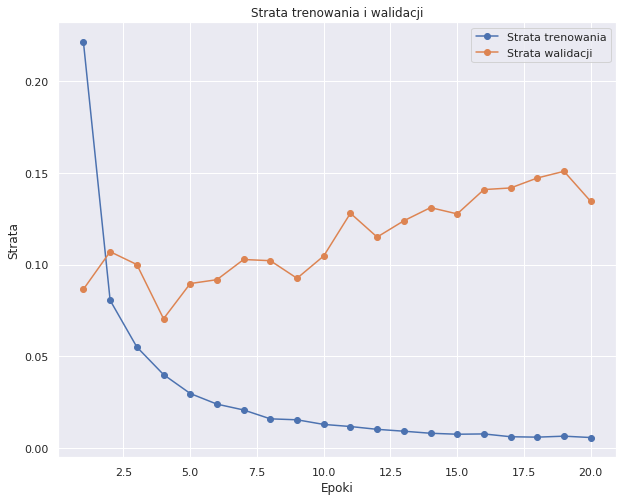

In [16]:
make_loss_plot(history)